In [53]:
import xarray as xr
import numpy as np
import pandas as pd

# 1. Data structures

## 1.1 Creating Data Structures

### 1.1.1 Data Arrays

create a DataArray named “height” from random data rng.random((180, 360)) * 400

1. with dimensions named “latitude” and “longitude”

In [2]:
rng = np.random.default_rng(seed=0)
randomData=rng.random((180,360))*400
height = xr.DataArray(data=randomData)
height

<xarray.DataArray (dim_0: 180, dim_1: 360)> Size: 518kB
array([[254.78467493, 107.91468551,  16.38940957, ..., 360.44323737,
        136.69706008,  95.57748468],
       [328.71680109, 233.99307209, 190.63536868, ..., 376.94421292,
        320.89846253,  48.94701864],
       [ 49.77143929, 246.49670012, 108.4826731 , ..., 107.27040832,
         86.18459353, 339.32512596],
       ...,
       [191.29475178,  64.01085709, 285.03118114, ...,  90.39013016,
        397.52540689, 309.36475129],
       [145.41534826,  16.18463217, 236.01756475, ..., 388.09452038,
         96.19908112, 183.22058129],
       [393.64705664,   2.99353683, 129.50138154, ..., 130.89893988,
        101.70591237, 159.53358201]], shape=(180, 360))
Dimensions without coordinates: dim_0, dim_1

2. with dimension coordinates:
    * “latitude”: -90 to 89 with step size 1
    * “longitude”: -180 to 179 with step size 1

In [3]:
height = xr.DataArray(data=randomData,
                      dims=("latitude", "longitude"),
                      coords={"latitude":np.arange(-90,90,1), "longitude":np.arange(-180,180,1)})
height

<xarray.DataArray (latitude: 180, longitude: 360)> Size: 518kB
array([[254.78467493, 107.91468551,  16.38940957, ..., 360.44323737,
        136.69706008,  95.57748468],
       [328.71680109, 233.99307209, 190.63536868, ..., 376.94421292,
        320.89846253,  48.94701864],
       [ 49.77143929, 246.49670012, 108.4826731 , ..., 107.27040832,
         86.18459353, 339.32512596],
       ...,
       [191.29475178,  64.01085709, 285.03118114, ...,  90.39013016,
        397.52540689, 309.36475129],
       [145.41534826,  16.18463217, 236.01756475, ..., 388.09452038,
         96.19908112, 183.22058129],
       [393.64705664,   2.99353683, 129.50138154, ..., 130.89893988,
        101.70591237, 159.53358201]], shape=(180, 360))
Coordinates:
  * latitude   (latitude) int64 1kB -90 -89 -88 -87 -86 -85 ... 85 86 87 88 89
  * longitude  (longitude) int64 3kB -180 -179 -178 -177 ... 176 177 178 179

3. with metadata for both data and coordinates:
    * height: “type”: “ellipsoid”
    * latitude: “type”: “geodetic”
    * longitude: “prime_meridian”: “greenwich”

In [4]:
height = xr.DataArray(data=randomData,
                      dims=("latitude", "longitude"),
                      coords={"latitude":("latitude", 
                                          np.arange(-90,90,1),
                                          {"type":"geodetic"}), #Add metadata to the coordinates 
                              "longitude":("longitude",
                                           np.arange(-180,180,1),
                                          {"type":{"prime_meridian":"greenwich"}})},
                      attrs={"type":"ellipsoid"}, #Add meta data for the actual data
                      name="height" #Add a name to the data
                     )
height

<xarray.DataArray 'height' (latitude: 180, longitude: 360)> Size: 518kB
array([[254.78467493, 107.91468551,  16.38940957, ..., 360.44323737,
        136.69706008,  95.57748468],
       [328.71680109, 233.99307209, 190.63536868, ..., 376.94421292,
        320.89846253,  48.94701864],
       [ 49.77143929, 246.49670012, 108.4826731 , ..., 107.27040832,
         86.18459353, 339.32512596],
       ...,
       [191.29475178,  64.01085709, 285.03118114, ...,  90.39013016,
        397.52540689, 309.36475129],
       [145.41534826,  16.18463217, 236.01756475, ..., 388.09452038,
         96.19908112, 183.22058129],
       [393.64705664,   2.99353683, 129.50138154, ..., 130.89893988,
        101.70591237, 159.53358201]], shape=(180, 360))
Coordinates:
  * latitude   (latitude) int64 1kB -90 -89 -88 -87 -86 -85 ... 85 86 87 88 89
  * longitude  (longitude) int64 3kB -180 -179 -178 -177 ... 176 177 178 179
Attributes:
    type:     ellipsoid

### 1.1.2 Datasets

1. create a Dataset with two variables along latitude and longitude: height and gravity_anomaly

In [5]:
gravity_anomaly = rng.random((180,360))*400-200
ds = xr.Dataset({"height":(("latitude", "longitude"),randomData),
                 "gravity_anomaly":(("latitude", "longitude"),gravity_anomaly)})
ds

<xarray.Dataset> Size: 1MB
Dimensions:          (latitude: 180, longitude: 360)
Dimensions without coordinates: latitude, longitude
Data variables:
    height           (latitude, longitude) float64 518kB 254.8 107.9 ... 159.5
    gravity_anomaly  (latitude, longitude) float64 518kB -7.615 ... -78.68

2. add coordinates to latitude and longitude:
    * latitude: from -90 to 90 with step size 1
    * longitude: from -180 to 180 with step size 1

In [6]:
# Add to existing dataset
ds.coords["latitude"] = np.arange(-90,90,1)
ds.coords["longitude"] = np.arange(-180,180,1)
ds

<xarray.Dataset> Size: 1MB
Dimensions:          (latitude: 180, longitude: 360)
Coordinates:
  * latitude         (latitude) int64 1kB -90 -89 -88 -87 -86 ... 85 86 87 88 89
  * longitude        (longitude) int64 3kB -180 -179 -178 -177 ... 177 178 179
Data variables:
    height           (latitude, longitude) float64 518kB 254.8 107.9 ... 159.5
    gravity_anomaly  (latitude, longitude) float64 518kB -7.615 ... -78.68

In [7]:
#Upon creation of a dataset
ds2 = xr.Dataset({"height":(("latitude", "longitude"),randomData),
                 "gravity_anomaly":(("latitude", "longitude"),gravity_anomaly)},
               coords={"latitude":np.arange(-90,90,1), "longitude":np.arange(-180,180,1)})
ds2

<xarray.Dataset> Size: 1MB
Dimensions:          (latitude: 180, longitude: 360)
Coordinates:
  * latitude         (latitude) int64 1kB -90 -89 -88 -87 -86 ... 85 86 87 88 89
  * longitude        (longitude) int64 3kB -180 -179 -178 -177 ... 177 178 179
Data variables:
    height           (latitude, longitude) float64 518kB 254.8 107.9 ... 159.5
    gravity_anomaly  (latitude, longitude) float64 518kB -7.615 ... -78.68

3. add metadata to coordinates and variables:
    * latitude: “type”: “geodetic”
    * longitude: “prime_meridian”: “greenwich”
    * height: “ellipsoid”: “wgs84”
    * gravity_anomaly: “ellipsoid”: “grs80”

In [8]:
xr.Dataset(
    {
        "height": (("latitude", "longitude"), randomData, {"ellipsoid": "wgs84"}),
        "gravity_anomaly": (("latitude", "longitude"), gravity_anomaly, {"ellipsoid": "grs80"}),
    },
    coords={
        "latitude": ("latitude", np.arange(-90, 90, 1), {"type": "geodetic"}),
        "longitude": (
            "longitude",
            np.arange(-180, 180, 1),
            {"prime_meridian": "greenwich"},
        ),
    },
)

<xarray.Dataset> Size: 1MB
Dimensions:          (latitude: 180, longitude: 360)
Coordinates:
  * latitude         (latitude) int64 1kB -90 -89 -88 -87 -86 ... 85 86 87 88 89
  * longitude        (longitude) int64 3kB -180 -179 -178 -177 ... 177 178 179
Data variables:
    height           (latitude, longitude) float64 518kB 254.8 107.9 ... 159.5
    gravity_anomaly  (latitude, longitude) float64 518kB -7.615 ... -78.68

## 1.2 Reading and writing files

In [9]:
# Ensure random arrays are the same each time
np.random.seed(0)

In [10]:
ds1 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(4, 2)),
        "b": (("z", "x"), np.random.randn(6, 4)),
    },
    coords={
        "x": np.arange(4),
        "y": np.arange(-2, 0),
        "z": np.arange(-3, 3),
    },
)
ds2 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(7, 3)),
        "b": (("z", "x"), np.random.randn(2, 7)),
    },
    coords={
        "x": np.arange(6, 13),
        "y": np.arange(3),
        "z": np.arange(3, 5),
    },
)

# write datasets
ds1.to_netcdf("ds1.nc")
ds2.to_netcdf("ds2.nc")

# write dataarray
ds1.a.to_netcdf("da1.nc")

In [11]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1C25-B250

 Directory of C:\Users\niels\Documents\Repositories\BmC\tutorials\Untitled Folder 1

25/04/2025  15:48    <DIR>          .
25/04/2025  14:09    <DIR>          ..
25/04/2025  14:12    <DIR>          .ipynb_checkpoints
28/04/2025  11:36             9.256 da1.nc
28/04/2025  11:36             8.544 ds1.nc
25/04/2025  15:43    <DIR>          ds1.zarr
28/04/2025  11:36             8.568 ds2.nc
25/04/2025  15:48           207.324 xarray fundamentals.ipynb
               4 File(s)        233.692 bytes
               4 Dir(s)  274.257.010.688 bytes free


In [12]:
xr.open_dataset("ds1.nc")

<xarray.Dataset> Size: 352B
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 32B 0 1 2 3
  * y        (y) int64 16B -2 -1
  * z        (z) int64 48B -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 64B ...
    b        (z, x) float64 192B ...

In [13]:
xr.open_dataarray("da1.nc")

<xarray.DataArray 'a' (x: 4, y: 2)> Size: 64B
[8 values with dtype=float64]
Coordinates:
  * x        (x) int64 32B 0 1 2 3
  * y        (y) int64 16B -2 -1

In [14]:
ds1.to_zarr("ds1.zarr", mode="w")

C:\Users\niels\Anaconda3\envs\BmC\Lib\site-packages\zarr\api\asynchronous.py:205: UserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(


In [15]:
xr.open_zarr("ds1.zarr", chunks=None)

<xarray.Dataset> Size: 352B
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 32B 0 1 2 3
  * y        (y) int64 16B -2 -1
  * z        (z) int64 48B -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 64B ...
    b        (z, x) float64 192B ...

# 1.3 Labeled data

## 1.3.1 Selecting data

In [18]:
xr.set_options(display_expand_attrs=False, display_expand_data=False)
ds = xr.tutorial.load_dataset("air_temperature")
da = ds["air"]

In [19]:
np_array = ds["air"].data  # numpy array
np_array.shape

(2920, 25, 53)

In [20]:
np_array[1, 0, 0]

np.float64(242.1)

In [21]:
# extract a time-series for one spatial location
np_array[:, 20, 40] #The second and third dimension are the longitude and latitude

array([295.  , 294.4 , 294.5 , ..., 297.29, 297.79, 297.99], shape=(2920,))

In [25]:
#Selection through numpy like indexing 
da[:, 20, 40]
#Selection through dimension labels
da.isel(lat=20, lon=40)

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
295.0 294.4 294.5 295.4 295.2 294.4 ... 297.2 297.7 297.3 297.3 297.8 298.0
Coordinates:
    lat      float32 4B 25.0
    lon      float32 4B 300.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

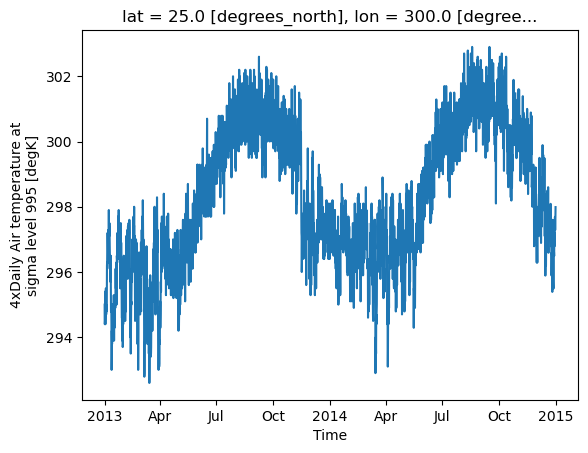

In [24]:
da.isel(lat=20, lon=40).plot()

In [30]:
#Numpy slicing
da[:20,20,40]
# Slicing with the named dimensions
da.isel(time=slice(0, 20), lat=20, lon=40)
#print(da[:20,20,40]==da.isel(time=slice(0, 20), lat=20, lon=40))

<xarray.DataArray 'air' (time: 20)> Size: 160B
295.0 294.4 294.5 295.4 295.2 294.4 ... 295.1 296.2 296.3 296.1 296.2 297.2
Coordinates:
    lat      float32 4B 25.0
    lon      float32 4B 300.0
  * time     (time) datetime64[ns] 160B 2013-01-01 ... 2013-01-05T18:00:00
Attributes: (11)

Indexing a DataArray directly works (mostly) just like it does for numpy arrays, except that the returned object is always another DataArray; however,when indexing with multiple arrays, positional indexing in Xarray behaves differently compared to NumPy.

__Positional indexing deviates from the NumPy behavior when indexing with multiple arrays__

In [34]:
"""
This is fancy (advanced) indexing. Here's what happens:

: → for the first axis (axis 0, usually rows or the batch dimension): select all elements.

[0, 1] → for the second axis (axis 1): select elements at indices 0 and 1.

[0, 1] → for the third axis (axis 2): select elements at indices 0 and 1.

But when you use two lists (for the second and third axes like [0, 1] and [0, 1]), NumPy treats it pairwise:

it takes the first element of each list together (0, 0)

and the second element of each list together (1, 1)

It pairs them: (0,0), (1,1).

Meaning: for each item along the first axis (because of the :), you're selecting:

element at position (0, 0)

and element at position (1, 1) on the second and third axes respectively.
"""
np_array[:, [0, 1], [0, 1]]

array([[241.2 , 244.5 ],
       [242.1 , 244.1 ],
       [242.3 , 244.39],
       ...,
       [243.49, 248.99],
       [245.79, 249.29],
       [245.09, 249.29]], shape=(2920, 2))

In [36]:
da[:, [0, 1], [0, 1]].values

array([[[241.2 , 242.5 ],
        [243.8 , 244.5 ]],

       [[242.1 , 242.7 ],
        [243.6 , 244.1 ]],

       [[242.3 , 242.2 ],
        [244.6 , 244.39]],

       ...,

       [[243.49, 242.99],
        [249.09, 248.99]],

       [[245.79, 244.79],
        [249.89, 249.29]],

       [[245.09, 244.29],
        [249.89, 249.29]]], shape=(2920, 2, 2))

To select data by coordinate labels instead of integer indices we can use the same syntax, using sel instead of isel

In [39]:
da.sel(lat=25, lon=210)

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
295.4 295.6 294.4 295.4 295.6 294.8 ... 293.0 293.5 295.1 295.5 295.2 295.5
Coordinates:
    lat      float32 4B 25.0
    lon      float32 4B 210.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

The label based selection methods sel() support method and tolerance keyword argument. The method parameter allows for enabling nearest neighbor (inexact) lookups by use of the methods pad, backfill or nearest

In [40]:
da.sel(lat=52.25, lon=251.8998, method="nearest")

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
262.7 263.2 270.9 274.1 273.3 270.6 ... 247.3 253.4 261.6 264.2 265.2 267.0
Coordinates:
    lat      float32 4B 52.5
    lon      float32 4B 252.5
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

### Excercises

Select the first 30 entries of latitude and 30th to 40th entries of longitude:

In [45]:
da.isel(lat=slice(0,30), lon=slice(30,40))

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 10)> Size: 6MB
248.4 248.3 248.3 248.6 249.0 249.5 ... 300.2 300.3 300.1 300.4 300.7 300.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 40B 275.0 277.5 280.0 282.5 ... 292.5 295.0 297.5
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

In [48]:
ds.isel(lat=slice(None, 30), lon=slice(30, 40))

<xarray.Dataset> Size: 6MB
Dimensions:  (lat: 25, time: 2920, lon: 10)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 40B 275.0 277.5 280.0 282.5 ... 292.5 295.0 297.5
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 6MB 248.4 248.3 248.3 ... 300.7 300.7
Attributes: (5)

why None instead of 0?

The key is: slice(start, stop) means "start at start, stop before stop".

If you write slice(0, 30), you are explicitly saying: start at index 0, go up to (but not including) 30.

If you write slice(None, 30), you are saying: "start at the beginning" (implicitly 0), up to (but not including) 30.

→ slice(None, 30) and slice(0, 30) are equivalent in this case.

Using None just makes it more flexible, because:

Maybe you are writing a general function where "starting point" could be flexible.

Or you are chaining slices, and sometimes you don't want to fix the start manually.

Or you just want to be a bit more "pythonic" or expressive: "from the beginning".

Select all data at 75 degree north and between Jan 1, 2013 and Oct 15, 2013

In [49]:
ds.sel(lat=75, time=slice("2013-01-01", "2013-10-15"))

<xarray.Dataset> Size: 498kB
Dimensions:  (time: 1152, lon: 53)
Coordinates:
    lat      float32 4B 75.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 9kB 2013-01-01 ... 2013-10-15T18:00:00
Data variables:
    air      (time, lon) float64 488kB 241.2 242.5 243.5 ... 259.3 259.3 259.2
Attributes: (5)

Remove all entries at 260 and 270 degrees

In [51]:
ds.drop_sel(lon=[260,270])

<xarray.Dataset> Size: 30MB
Dimensions:  (lat: 25, time: 2920, lon: 51)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 204B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 30MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes: (5)

## 1.3.2 Manipulating data

In [54]:
arr = xr.DataArray(
    np.random.randn(4, 6),
    dims=("x", "y"),
    coords={
        "x": [-3.2, 2.1, 5.3, 6.5],
        "y": pd.date_range("2009-01-05", periods=6, freq="M"),
    },
)
arr

C:\Users\niels\AppData\Local\Temp\ipykernel_33300\39313188.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "y": pd.date_range("2009-01-05", periods=6, freq="M"),


<xarray.DataArray (x: 4, y: 6)> Size: 192B
1.222 0.2083 0.9766 0.3564 0.7066 0.0105 ... 1.868 0.906 -0.8612 1.91 -0.268
Coordinates:
  * x        (x) float64 32B -3.2 2.1 5.3 6.5
  * y        (y) datetime64[ns] 48B 2009-01-31 2009-02-28 ... 2009-06-30

In [55]:
other = xr.DataArray(
    dims=("x", "y"),
    coords={
        "x": np.linspace(2, 4, 10),
        "y": pd.date_range("2009-04-01", "2009-04-30", freq="D"),
    },
)
arr.interp_like(other)

<xarray.DataArray (x: 10, y: 30)> Size: 2kB
0.4609 0.5089 0.557 0.605 0.6531 0.7011 ... 0.6258 0.5992 0.5726 0.546 0.5194
Coordinates:
  * x        (x) float64 80B 2.0 2.222 2.444 2.667 ... 3.333 3.556 3.778 4.0
  * y        (y) datetime64[ns] 240B 2009-04-01 2009-04-02 ... 2009-04-30